<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 20: **Modelos lineares mistos**
____

*Exemplo de aplicação: experimento em DBC, 5 tratamentos e 4 blocos*

In [1]:
gotas <- read.csv("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/gotas.csv", colClasses=c("factor", "factor", "numeric"))
str(gotas)

'data.frame':	20 obs. of  3 variables:
 $ trat : Factor w/ 5 levels "T1","T2","T3",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ bloco: Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 2 2 2 2 2 ...
 $ resp : num  422.8 52.1 810.3 92.4 25.6 ...


In [2]:
# ajuste do modelo misto com efeito aleatório de bloco
library(nlme)
lme.gotas <- lme(resp ~ trat, random = ~1|bloco, data = gotas)
summary(lme.gotas)

Linear mixed-effects model fit by REML
  Data: gotas 
       AIC    BIC   logLik
  211.3136 216.27 -98.6568

Random effects:
 Formula: ~1 | bloco
        (Intercept) Residual
StdDev:     28.2997 135.2798

Fixed effects:  resp ~ trat 
                Value Std.Error DF   t-value p-value
(Intercept)  318.5550  69.10406 12  4.609787  0.0006
tratT2      -201.9075  95.65723 12 -2.110740  0.0565
tratT3       463.3475  95.65723 12  4.843831  0.0004
tratT4      -215.7700  95.65723 12 -2.255658  0.0436
tratT5      -279.1000  95.65723 12 -2.917709  0.0129
 Correlation: 
       (Intr) tratT2 tratT3 tratT4
tratT2 -0.692                     
tratT3 -0.692  0.500              
tratT4 -0.692  0.500  0.500       
tratT5 -0.692  0.500  0.500  0.500

Standardized Within-Group Residuals:
         Min           Q1          Med           Q3          Max 
-1.704300145 -0.320895230 -0.002007716  0.289337477  2.713555332 

Number of Observations: 20
Number of Groups: 4 

In [3]:
# matriz do modelo para efeitos fixos
X <- model.matrix( ~ trat, data = gotas)
X

,(Intercept),tratT2,tratT3,tratT4,tratT5
1,1,0,0,0,0
2,1,1,0,0,0
3,1,0,1,0,0
4,1,0,0,1,0
5,1,0,0,0,1
6,1,0,0,0,0
7,1,1,0,0,0
8,1,0,1,0,0
9,1,0,0,1,0
10,1,0,0,0,1


In [4]:
# matriz do modelo para efeitos aleatórios
Z <- model.matrix( ~ -1 + bloco, data = gotas)
Z

,bloco1,bloco2,bloco3,bloco4
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0
10,0,1,0,0


In [5]:
# coeficientes de efeito fixo (BLUE)
fixef(lme.gotas)

(Intercept)      tratT2      tratT3      tratT4      tratT5 
   318.5550   -201.9075    463.3475   -215.7700   -279.1000

In [6]:
# valores preditos de efeito eleatório (BLUP)
ranef(lme.gotas)

,(Intercept)
,<dbl>
1,1.573921
2,-9.455196
3,-8.477128
4,16.358402


In [7]:
# componentes de variância
VarCorr(lme.gotas)

bloco = pdLogChol(1) 
            Variance   StdDev  
(Intercept)   800.8731  28.2997
Residual    18300.6118 135.2798

In [8]:
# matriz G de var-cov
var.b <- as.numeric(VarCorr(lme.gotas)[1, "Variance"])
G <- diag(ncol(Z)) * var.b
G

800.8731,0.0000,0.0000,0.0000
0.0000,800.8731,0.0000,0.0000
0.0000,0.0000,800.8731,0.0000
0.0000,0.0000,0.0000,800.8731


In [9]:
# matriz Sigma de var-cov residual
var.r <- as.numeric(VarCorr(lme.gotas)[2, "Variance"])
n <- nrow(gotas)
Sigma <- diag(n) * var.r
Sigma[1:6, 1:6]                    # para as 6 primeiras observações

18300.61,0.00,0.00,0.00,0.00,0.00
0.00,18300.61,0.00,0.00,0.00,0.00
0.00,0.00,18300.61,0.00,0.00,0.00
0.00,0.00,0.00,18300.61,0.00,0.00
0.00,0.00,0.00,0.00,18300.61,0.00
0.00,0.00,0.00,0.00,0.00,18300.61


In [10]:
# matriz V de var-cov
V <- Z %*% G %*% t(Z) + Sigma
V[1:6, 1:6]                        # para as 6 primeiras observações

,1,2,3,4,5,6
1,19101.4849,800.8731,800.8731,800.8731,800.8731,0.00
2,800.8731,19101.4849,800.8731,800.8731,800.8731,0.00
3,800.8731,800.8731,19101.4849,800.8731,800.8731,0.00
4,800.8731,800.8731,800.8731,19101.4849,800.8731,0.00
5,800.8731,800.8731,800.8731,800.8731,19101.4849,0.00
6,0.0000,0.0000,0.0000,0.0000,0.0000,19101.48


In [11]:
# visualizando a estrutura bloco-diagonal de V
library(Matrix)
Matrix(abs(V) > 0, sparse = TRUE)              # representação de matriz esparsa

   [[ suppressing 20 column names ‘1’, ‘2’, ‘3’ ... ]]



20 x 20 sparse Matrix of class "lsCMatrix"
                                          
1  | | | | | . . . . . . . . . . . . . . .
2  | | | | | . . . . . . . . . . . . . . .
3  | | | | | . . . . . . . . . . . . . . .
4  | | | | | . . . . . . . . . . . . . . .
5  | | | | | . . . . . . . . . . . . . . .
6  . . . . . | | | | | . . . . . . . . . .
7  . . . . . | | | | | . . . . . . . . . .
8  . . . . . | | | | | . . . . . . . . . .
9  . . . . . | | | | | . . . . . . . . . .
10 . . . . . | | | | | . . . . . . . . . .
11 . . . . . . . . . . | | | | | . . . . .
12 . . . . . . . . . . | | | | | . . . . .
13 . . . . . . . . . . | | | | | . . . . .
14 . . . . . . . . . . | | | | | . . . . .
15 . . . . . . . . . . | | | | | . . . . .
16 . . . . . . . . . . . . . . . | | | | |
17 . . . . . . . . . . . . . . . | | | | |
18 . . . . . . . . . . . . . . . | | | | |
19 . . . . . . . . . . . . . . . | | | | |
20 . . . . . . . . . . . . . . . | | | | |

In [12]:
# matriz de var-cov dos efeitos fixos ( pode ser obtida com vcov(lme.gotas) )
var_beta <- solve(t(X) %*% solve(V) %*% X)
var_beta

,(Intercept),tratT2,tratT3,tratT4,tratT5
(Intercept),4775.371,-4575.153,-4575.153,-4575.153,-4575.153
tratT2,-4575.153,9150.306,4575.153,4575.153,4575.153
tratT3,-4575.153,4575.153,9150.306,4575.153,4575.153
tratT4,-4575.153,4575.153,4575.153,9150.306,4575.153
tratT5,-4575.153,4575.153,4575.153,4575.153,9150.306


Teste do contraste $C_1 = \mu_3 - \frac{1}{2}(\mu_4 + \mu_5)$

In [13]:
# coeficientes do contraste
L <- c(0, 0, 1, -0.5, -0.5)

# efeitos fixos do modelo
B <- fixef(lme.gotas)

# estimativa do contraste
C1 <- L %*% B
C1

# erro padrao do contraste
ep_C1 <- sqrt( t(L) %*% var_beta %*% L )
ep_C1

# estatistica do teste t
t_C1 <- C1/ep_C1
t_C1

# p-valor (bilateral)
pt(t_C1, df = 16, lower.tail = FALSE) * 2

710.7825


82.84159


8.58002


2.210756e-07


In [14]:
# teste de C1 com o pacote emmeans
library(emmeans)
medias <- lsmeans(lme.gotas, specs = "trat")
contrast(medias, list(C1 = c(0, 0, 1, -0.5, -0.5)))

 contrast estimate   SE df t.ratio p.value
 C1            711 82.8 12 8.580   <.0001 

Degrees-of-freedom method: containment 

_____
*Estendendo o modelo*

In [15]:
# média e variância de cada tratamento
print(aggregate(resp ~ trat, data = gotas, FUN = function(y) c(v = var(y), m = mean(y))))

  trat     resp.v     resp.m
1   T1  9854.5062   318.5550
2   T2  6746.3168   116.6475
3   T3 78319.5998   781.9025
4   T4   501.1975   102.7850
5   T5    85.8023    39.4550


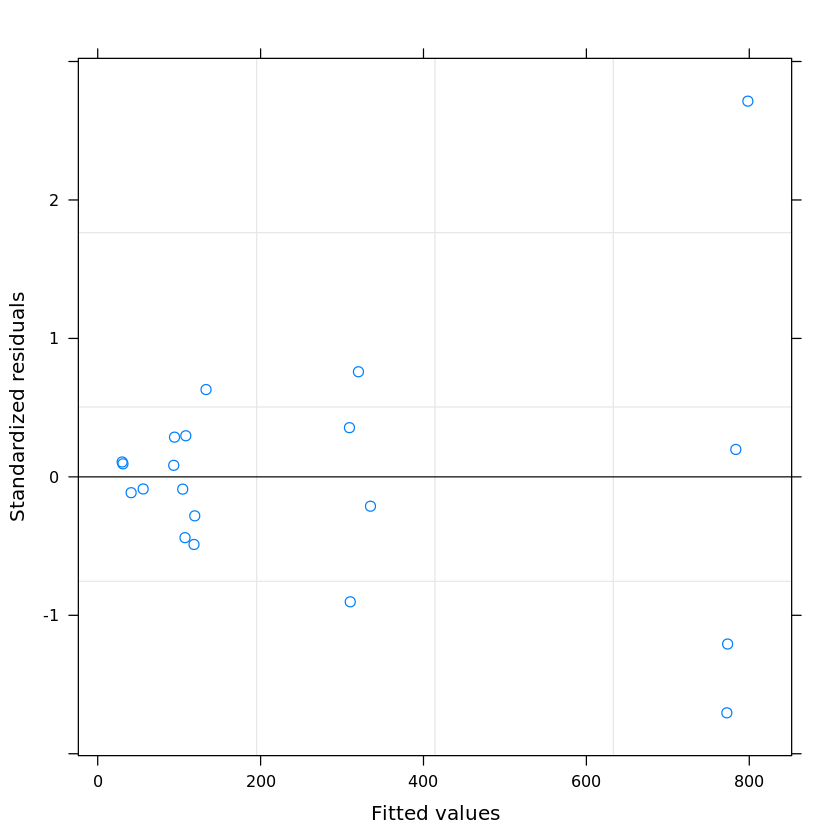

In [16]:
# gráfico dos resíduos de Pearson vs valores ajustados
plot(lme.gotas)

In [17]:
# atualizando o modelo colocando estrutura de heterocedasticidade para tratamentos
lme.var <- update(lme.gotas, weights = varIdent(1, form = ~1|trat))
summary(lme.var)

Linear mixed-effects model fit by REML
  Data: gotas 
       AIC      BIC    logLik
  191.1825 198.9711 -84.59126

Random effects:
 Formula: ~1 | bloco
        (Intercept) Residual
StdDev:     8.08537 104.6088

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | trat 
 Parameter estimates:
        T1         T2         T3         T4         T5 
1.00000000 0.75478317 2.68477709 0.20271202 0.04172154 
Fixed effects:  resp ~ trat 
                Value Std.Error DF   t-value p-value
(Intercept)  318.5550  52.46041 12  6.072293  0.0001
tratT2      -201.9075  65.53093 12 -3.081102  0.0095
tratT3       463.3475 149.85035 12  3.092068  0.0093
tratT4      -215.7700  53.36825 12 -4.043041  0.0016
tratT5      -279.1000  52.34992 12 -5.331431  0.0002
 Correlation: 
       (Intr) tratT2 tratT3 tratT4
tratT2 -0.796                     
tratT3 -0.348  0.279              
tratT4 -0.977  0.782  0.342       
tratT5 -0.996  0.797  0.349  0.979

Standardized Within-Gro

In [18]:
# comparação dos dois modelos
print(anova(lme.gotas, lme.var))

          Model df      AIC      BIC    logLik   Test  L.Ratio p-value
lme.gotas     1  7 211.3136 216.2699 -98.65680                        
lme.var       2 11 191.1825 198.9711 -84.59126 1 vs 2 28.13107  <.0001


In [19]:
# nova matriz V (agora obtida com o pacote mgcv)
library(mgcv)
extract.lme.cov(lme.var)[1:6, 1:6]                      # para as 6 primeiras observações

This is mgcv 1.8-34. For overview type 'help("mgcv-package")'.



11008.3805,65.3732,65.3732,65.3732,65.37320,0.00
65.3732,6299.5786,65.3732,65.3732,65.37320,0.00
65.3732,65.3732,78942.8764,65.3732,65.37320,0.00
65.3732,65.3732,65.3732,515.0450,65.37320,0.00
65.3732,65.3732,65.3732,65.3732,84.42156,0.00
0.0000,0.0000,0.0000,0.0000,0.00000,11008.38


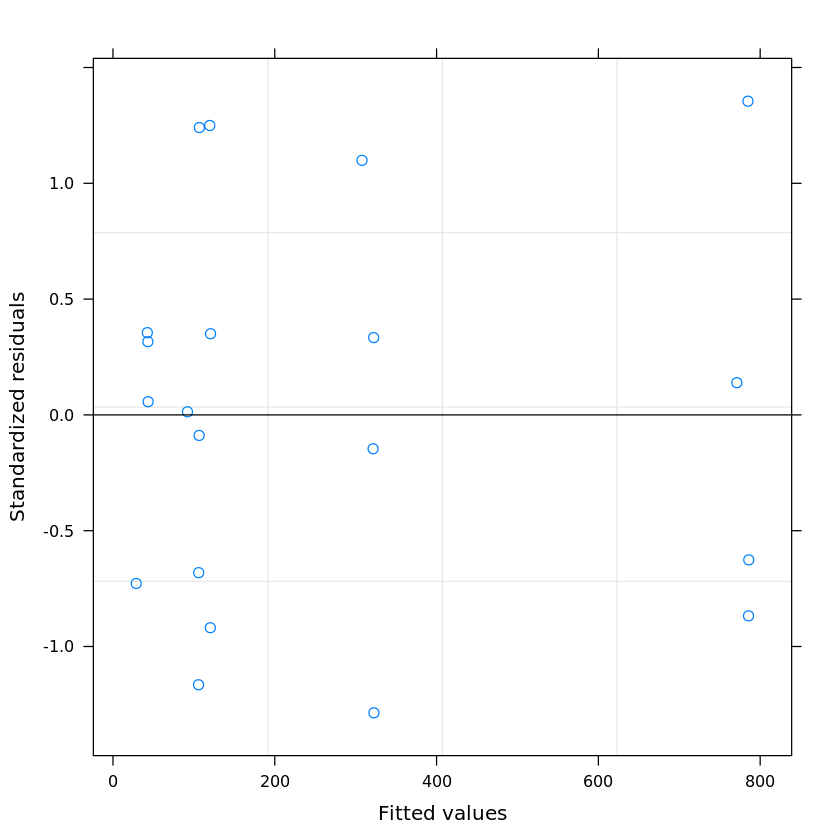

In [20]:
# resíduos de Pearson vs valores ajustados
plot(lme.var)

In [21]:
# inicializando uma estrutura de correlação do tipo AR1 para bloco
mc <- corAR1(0.8, form = ~1|bloco)
mci <- Initialize(mc, data = gotas)
corMatrix(mci, data = gotas)

1.0000,0.800,0.64,0.512,0.4096
0.8000,1.000,0.80,0.640,0.5120
0.6400,0.800,1.00,0.800,0.6400
0.5120,0.640,0.80,1.000,0.8000
0.4096,0.512,0.64,0.800,1.0000
1.0000,0.800,0.64,0.512,0.4096
0.8000,1.000,0.80,0.640,0.5120
0.6400,0.800,1.00,0.800,0.6400
0.5120,0.640,0.80,1.000,0.8000
0.4096,0.512,0.64,0.800,1.0000
1.0000,0.800,0.64,0.512,0.4096


In [22]:
# atualizando o modelo colocando a estrutura de correlação
lme.cor <- update(lme.var, correlation = mc)
lme.cor

Linear mixed-effects model fit by REML
  Data: gotas 
  Log-restricted-likelihood: -84.40048
  Fixed: resp ~ trat 
(Intercept)      tratT2      tratT3      tratT4      tratT5 
   318.5550   -201.9075    463.3475   -215.7700   -279.1000 

Random effects:
 Formula: ~1 | bloco
        (Intercept) Residual
StdDev:    9.262949 102.1698

Correlation Structure: AR(1)
 Formula: ~1 | bloco 
 Parameter estimate(s):
       Phi 
-0.2313518 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | trat 
 Parameter estimates:
          T1           T2           T3           T4           T5 
1.000000e+00 8.162452e-01 2.861763e+00 1.989117e-01 9.448249e-08 
Number of Observations: 20
Number of Groups: 4 

In [23]:
# nova matriz V
extract.lme.cov(lme.cor)[1:6, 1:6]    # para as 6 primeiras observações

10524.46808,-1885.43366,1684.71405,60.09090,85.80222,0.00
-1885.43366,7040.62876,-5555.40724,176.51573,85.80221,0.00
1684.71405,-5555.40724,85575.19984,-1288.91065,85.80237,0.00
60.09090,176.51573,-1288.91065,498.81724,85.80217,0.00
85.80222,85.80221,85.80237,85.80217,85.80222,0.00
0.00000,0.00000,0.00000,0.00000,0.00000,10524.47


In [24]:
# comparando os três modelos
print(anova(lme.gotas, lme.var, lme.cor))

          Model df      AIC      BIC    logLik   Test   L.Ratio p-value
lme.gotas     1  7 211.3136 216.2699 -98.65680                         
lme.var       2 11 191.1825 198.9711 -84.59126 1 vs 2 28.131071  <.0001
lme.cor       3 12 192.8010 201.2976 -84.40048 2 vs 3  0.381566  0.5368


In [25]:
# comparação de médias aos pares com o modelo inicial
lsmeans(lme.gotas, pairwise ~ trat)

$lsmeans
 trat lsmean   SE df lower.CL upper.CL
 T1    318.6 69.1  3     98.6      538
 T2    116.6 69.1  3   -103.3      337
 T3    781.9 69.1  3    562.0     1002
 T4    102.8 69.1  3   -117.1      323
 T5     39.5 69.1  3   -180.5      259

Degrees-of-freedom method: containment 
Confidence level used: 0.95 

$contrasts
 contrast estimate   SE df t.ratio p.value
 T1 - T2     201.9 95.7 12  2.111  0.2766 
 T1 - T3    -463.3 95.7 12 -4.844  0.0030 
 T1 - T4     215.8 95.7 12  2.256  0.2245 
 T1 - T5     279.1 95.7 12  2.918  0.0787 
 T2 - T3    -665.3 95.7 12 -6.955  0.0001 
 T2 - T4      13.9 95.7 12  0.145  0.9999 
 T2 - T5      77.2 95.7 12  0.807  0.9235 
 T3 - T4     679.1 95.7 12  7.099  0.0001 
 T3 - T5     742.4 95.7 12  7.762  <.0001 
 T4 - T5      63.3 95.7 12  0.662  0.9609 

Degrees-of-freedom method: containment 
P value adjustment: tukey method for comparing a family of 5 estimates

In [26]:
# comparação de médias aos pares com o modelo final
lsmeans(lme.var, pairwise ~ trat)

$lsmeans
 trat lsmean     SE df lower.CL upper.CL
 T1    318.6  52.46  3   151.60    485.5
 T2    116.6  39.68  3    -9.65    242.9
 T3    781.9 140.48  3   334.82   1229.0
 T4    102.8  11.35  3    66.67    138.9
 T5     39.5   4.59  3    24.83     54.1

Degrees-of-freedom method: containment 
Confidence level used: 0.95 

$contrasts
 contrast estimate    SE df t.ratio p.value
 T1 - T2     201.9  65.5 12  3.081  0.0599 
 T1 - T3    -463.3 149.9 12 -3.092  0.0588 
 T1 - T4     215.8  53.4 12  4.043  0.0115 
 T1 - T5     279.1  52.3 12  5.331  0.0014 
 T2 - T3    -665.3 145.9 12 -4.561  0.0048 
 T2 - T4      13.9  40.9 12  0.339  0.9967 
 T2 - T5      77.2  39.5 12  1.952  0.3433 
 T3 - T4     679.1 140.8 12  4.822  0.0031 
 T3 - T5     742.4 140.4 12  5.286  0.0015 
 T4 - T5      63.3  10.8 12  5.850  0.0006 

Degrees-of-freedom method: containment 
P value adjustment: tukey method for comparing a family of 5 estimates

_____
**Uma análise de medidas repetidas**

In [27]:
# exemplo: experimento DBC com 3 tratamentos e 4 repetições. Cada unidade experimental foi avaliada em 4 instantes
amargoso <- read.csv("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/dinsularis.csv")
str(amargoso)

'data.frame':	48 obs. of  4 variables:
 $ Tempo   : int  7 14 21 28 7 14 21 28 7 14 ...
 $ Trat    : Factor w/ 3 levels "CH","QG","QGC": 2 2 2 2 2 2 2 2 2 2 ...
 $ Vaso    : Factor w/ 12 levels "id-01","id-02",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ Controle: int  10 60 50 85 10 45 45 75 25 50 ...


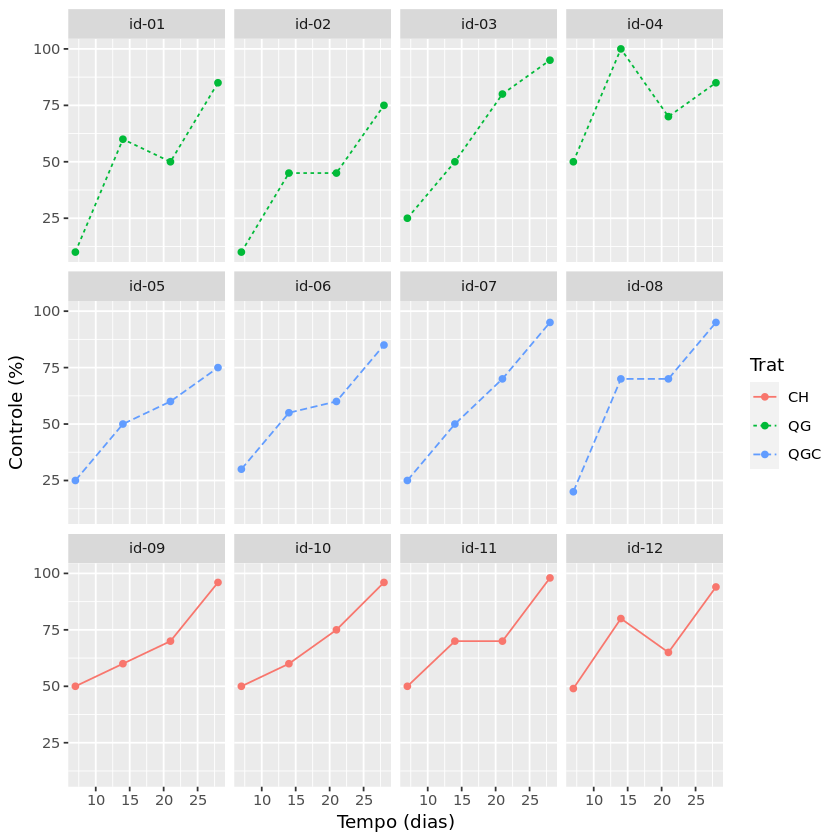

In [28]:
# visualizando os dados
library(ggplot2)
ggplot(amargoso, 
    aes(x=Tempo, y=Controle, colour = Trat, lty = Trat)) + 
    geom_line() + geom_point() + facet_wrap(~Vaso) + 
    xlab("Tempo (dias)") + ylab("Controle (%)")

In [29]:
# reorganizando os dados para análise de perfis
drep <- with(amargoso, 
    data.frame(split(Controle, Tempo), Vaso=levels(Vaso), 
    Trat = rep(unique(Trat), each = 4)))
drep

X7,X14,X21,X28,Vaso,Trat
<int>,<int>,<int>,<int>,<fct>,<fct>
10,60,50,85,id-01,QG
10,45,45,75,id-02,QG
25,50,80,95,id-03,QG
50,100,70,85,id-04,QG
25,50,60,75,id-05,QGC
30,55,60,85,id-06,QGC
25,50,70,95,id-07,QGC
20,70,70,95,id-08,QGC
50,60,70,96,id-09,CH


In [30]:
mod.mrep <- lm(cbind(X7, X14, X21, X28) ~ Trat, data=drep)  # ajuste do modelo de MANOVA
cov2cor(SSD(mod.mrep)$SSD)                                  # matriz de correlação entre tempos

,X7,X14,X21,X28
X7,1.0000000,0.7035679,0.5629437,0.1387122
X14,0.7035679,1.0000000,0.2493850,0.1551699
X21,0.5629437,0.2493850,1.0000000,0.7455740
X28,0.1387122,0.1551699,0.7455740,1.0000000


In [31]:
# inicializando estrutura de simetria composta (esfericidade) de correlação
sc <- corCompSymm(0.5, form = ~1|Vaso)
isc <- Initialize(sc, data = amargoso)
corMatrix(isc)

1.0,0.5,0.5,0.5
0.5,1.0,0.5,0.5
0.5,0.5,1.0,0.5
0.5,0.5,0.5,1.0
1.0,0.5,0.5,0.5
0.5,1.0,0.5,0.5
0.5,0.5,1.0,0.5
0.5,0.5,0.5,1.0
1.0,0.5,0.5,0.5
0.5,1.0,0.5,0.5
0.5,0.5,1.0,0.5


In [32]:
# teste de Mauchly para esfericidade
mauchly.test(mod.mrep, Sigma = corMatrix(isc)[[1]])


	Mauchly's test of sphericity

data:  SSD matrix from lm(formula = cbind(X7, X14, X21, X28) ~ Trat, data = drep)
W = 0.079856, p-value = 0.03095


In [33]:
# ajuste do modelo misto com efeito aleatório de Vaso (unidades experimentais)
lme.am <- lme(Controle ~ Trat/Tempo, random = ~1|Vaso, data = amargoso)
lme.am

Linear mixed-effects model fit by REML
  Data: amargoso 
  Log-restricted-likelihood: -179.7261
  Fixed: Controle ~ Trat/Tempo 
  (Intercept)        TratQG       TratQGC  TratCH:Tempo  TratQG:Tempo 
    35.500000    -22.375000    -26.125000      2.017857      2.589286 
TratQGC:Tempo 
     2.803571 

Random effects:
 Formula: ~1 | Vaso
        (Intercept) Residual
StdDev:     6.56419 11.28598

Number of Observations: 48
Number of Groups: 12 

In [34]:
# matriz V de var-cov das observações
V.am <- extract.lme.cov(lme.am)
V.am[1:6, 1:6]                          # para as 6 primeiras observações

170.4619,43.0886,43.0886,43.0886,0.0000,0.0000
43.0886,170.4619,43.0886,43.0886,0.0000,0.0000
43.0886,43.0886,170.4619,43.0886,0.0000,0.0000
43.0886,43.0886,43.0886,170.4619,0.0000,0.0000
0.0000,0.0000,0.0000,0.0000,170.4619,43.0886
0.0000,0.0000,0.0000,0.0000,43.0886,170.4619


In [35]:
ne <- corSymm(form = ~1|Vaso)                # definindo matriz não estruturada de correlação
lme2.am <- update(lme.am, correlation = ne)  # atualização a estrutura de correlação do modelo
lme2.am

Linear mixed-effects model fit by REML
  Data: amargoso 
  Log-restricted-likelihood: -173.3219
  Fixed: Controle ~ Trat/Tempo 
  (Intercept)        TratQG       TratQGC  TratCH:Tempo  TratQG:Tempo 
    53.387194    -54.066903    -51.559114      1.423510      3.371387 
TratQGC:Tempo 
     3.226763 

Random effects:
 Formula: ~1 | Vaso
        (Intercept) Residual
StdDev:    6.756415 13.21262

Correlation Structure: General
 Formula: ~1 | Vaso 
 Parameter estimate(s):
 Correlation: 
  1      2      3     
2  0.372              
3  0.390 -0.233       
4 -0.593 -0.535  0.476
Number of Observations: 48
Number of Groups: 12 

In [36]:
# nova matriz V
V2.am <- extract.lme.cov(lme2.am)
V2.am[1:6, 1:6]                        # para as 6 primeiras observações

220.22257,110.591875,113.729634,-57.86852,0.0000,0.0000
110.59187,220.222574,4.891553,-47.69957,0.0000,0.0000
113.72963,4.891553,220.222574,128.73091,0.0000,0.0000
-57.86852,-47.699566,128.730905,220.22257,0.0000,0.0000
0.00000,0.000000,0.000000,0.00000,220.2226,110.5919
0.00000,0.000000,0.000000,0.00000,110.5919,220.2226


In [37]:
# comparando os modelos
print(anova(lme.am, lme2.am))

        Model df      AIC      BIC    logLik   Test  L.Ratio p-value
lme.am      1  8 375.4522 389.3535 -179.7261                        
lme2.am     2 14 374.6438 398.9712 -173.3219 1 vs 2 12.80836  0.0462


In [38]:
# teste dos efeitos do modelo escolhido
anova(lme2.am)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,33,821.2099,0.000000e+00
Trat,2,9,13.4122,1.996575e-03
Trat:Tempo,3,33,37.6687,9.165935e-11


In [39]:
# estimativas de efeito fixo (BLUE)
fixef(update(lme2.am, fixed = ~ -1 + Trat/Tempo))  # retirando a constante para obtenção direta dos interceptos de cada trat

TratCH        TratQG       TratQGC  TratCH:Tempo  TratQG:Tempo 
   53.3871868    -0.6797322     1.8280677     1.4235103     3.3713891 
TratQGC:Tempo 
    3.2267644

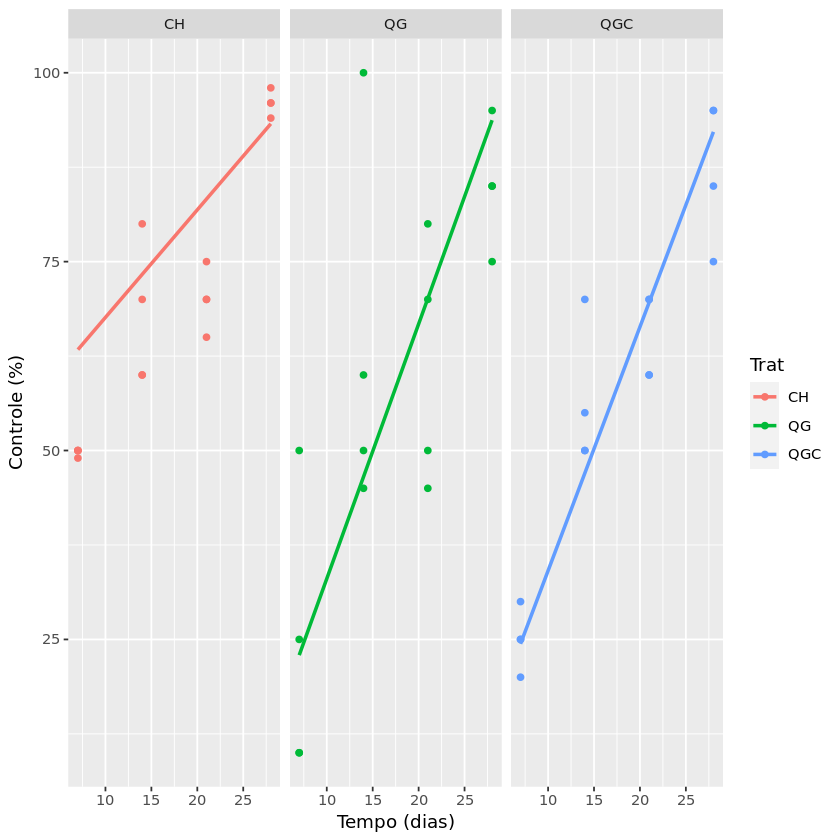

In [40]:
# gráfico com o modelo ajustado
amargoso$pred <- predict(lme2.am, level = 0)  # predição com a parte fixa apenas (level = 0)
ggplot(amargoso, aes(colour = Trat)) + 
	facet_wrap(~Trat) +
	geom_point(aes(Tempo, Controle)) + 
	geom_line(aes(Tempo, pred), lwd = 1) +
	xlab("Tempo (dias)") + ylab("Controle (%)")

____
**Um exemplo com variância genética**

In [41]:
# dados: DIC, 16 genótipos, 4 repetições
pimenta <- read.csv('https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/pimenta.csv')
str(pimenta)

'data.frame':	64 obs. of  6 variables:
 $ genotipo   : int  1 1 1 1 2 2 2 2 3 3 ...
 $ repet      : int  1 2 3 4 1 2 3 4 1 2 ...
 $ altura     : num  19 16 17 16 22 23 22.5 23 23 24 ...
 $ nfrutos    : int  42 44 34 37 45 45 22 30 121 108 ...
 $ largura    : num  1.69 2.2 1.64 1.2 1.41 1.47 3.04 2.42 0.56 0.6 ...
 $ comprimento: num  2.5 2.87 2.49 2.09 2.1 2.15 3.16 2.72 1.51 1.67 ...


In [42]:
# ajuste do modelo
lme.pim <- lme(altura ~ 1, random = ~1|genotipo, data = pimenta)
lme.pim

Linear mixed-effects model fit by REML
  Data: pimenta 
  Log-restricted-likelihood: -191.6403
  Fixed: altura ~ 1 
(Intercept) 
   26.39844 

Random effects:
 Formula: ~1 | genotipo
        (Intercept) Residual
StdDev:     10.2903 3.121039

Number of Observations: 64
Number of Groups: 16 

In [43]:
# Componentes de variância
VarCorr(lme.pim)

genotipo = pdLogChol(1) 
            Variance   StdDev   
(Intercept) 105.890234 10.290298
Residual      9.740885  3.121039

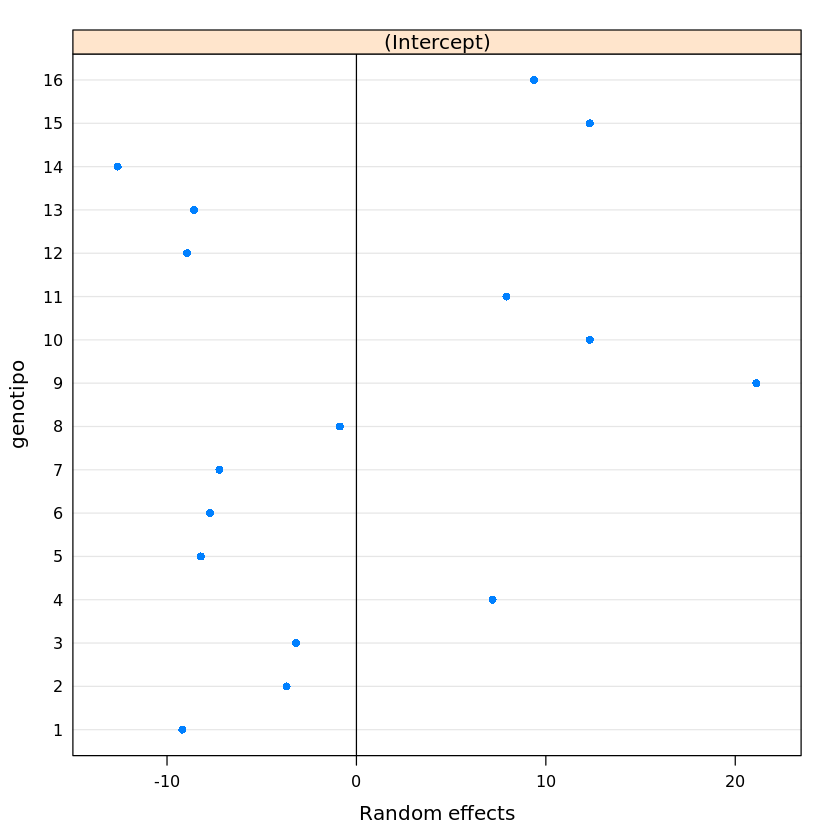

In [44]:
# BLUPs
plot(ranef(lme.pim), abline = c(v = 0))

In [45]:
# matriz de covariância dos desvios padrão (em escala log)
cov.sd <- lme.pim$apVar
cov.sd

,reStruct.genotipo,lSigma
reStruct.genotipo,0.0348895082,-0.0002394767
lSigma,-0.0002394767,0.0104166120


In [46]:
log.sd <- attr(lme.pim$apVar, "Pars")   # log dos desvios padrão
exp(log.sd)^2                           # componentes de variâncias

reStruct.genotipo            lSigma 
       105.890234          9.740885

In [47]:
# IC 95% para os desvios padrão
z <- qnorm(0.975)                        # quantil normal
exp(log.sd - z * sqrt(diag(cov.sd)))     # limites inferiores
exp(log.sd + z * sqrt(diag(cov.sd)))     # limites superiores

reStruct.genotipo            lSigma 
         7.135662          2.555195

reStruct.genotipo            lSigma 
        14.839580          3.812189

In [48]:
# IC95%, agora com a função intervals()
intervals(lme.pim, which = "var-cov")

Approximate 95% confidence intervals

 Random Effects:
  Level: genotipo 
                   lower    est.    upper
sd((Intercept)) 7.135662 10.2903 14.83958

 Within-group standard error:
   lower     est.    upper 
2.555195 3.121039 3.812189 

In [49]:
# Obtendo os desvios padrão dos componentes de variância pelo método delta
library(car)
deltaMethod(log.sd, "exp(reStruct.genotipo)^2", cov.sd)    # var. genética
deltaMethod(log.sd, "exp(lSigma)^2", cov.sd)               # var. residual

Loading required package: carData



,Estimate,SE,2.5 %,97.5 %
,<dbl>,<dbl>,<dbl>,<dbl>
exp(reStruct.genotipo)^2,105.8902,39.55791,28.35816,183.4223


,Estimate,SE,2.5 %,97.5 %
,<dbl>,<dbl>,<dbl>,<dbl>
exp(lSigma)^2,9.740885,1.988345,5.843801,13.63797


In [50]:
# herdabilidade no sentido amplo e desvio padrão da herdabilidade, pelo método delta
r <- 4    # n rep.
dm <- deltaMethod(log.sd, "exp(reStruct.genotipo)^2/(exp(reStruct.genotipo)^2 + exp(lSigma)^2/r)", cov.sd)
c(dm)

$Estimate
[1] 0.9775194

$SE
[1] 0.009404274

$`2.5 %`
[1] 0.9590874

$`97.5 %`
[1] 0.9959514

____
**Modelo linear generalizado misto**

In [51]:
library(MASS)
glmm.gotas <- glmmPQL(resp ~ trat, random = ~1|bloco, correlation = mc, data = gotas, family = Gamma)
summary(glmm.gotas)

iteration 1



Linear mixed-effects model fit by maximum likelihood
  Data: gotas 
  AIC BIC logLik
   NA  NA     NA

Random effects:
 Formula: ~1 | bloco
         (Intercept)  Residual
StdDev: 4.545257e-06 0.3514815

Correlation Structure: AR(1)
 Formula: ~1 | bloco 
 Parameter estimate(s):
          Phi 
-0.0003292146 
Variance function:
 Structure: fixed weights
 Formula: ~invwt 
Fixed effects:  resp ~ trat 
                   Value   Std.Error DF   t-value p-value
(Intercept)  0.003139175 0.000637032 12  4.927816  0.0003
tratT2       0.005433662 0.001852782 12  2.932705  0.0125
tratT3      -0.001860244 0.000687865 12 -2.704371  0.0192
tratT4       0.006589871 0.002074522 12  3.176572  0.0080
tratT5       0.022206155 0.005182575 12  4.284773  0.0011
 Correlation: 
       (Intr) tratT2 tratT3 tratT4
tratT2 -0.344                     
tratT3 -0.926  0.319              
tratT4 -0.307  0.106  0.284       
tratT5 -0.123  0.042  0.114  0.037

Standardized Within-Group Residuals:
        Min          Q1 